# 06. 매개효과 분석


- **매개변수** : 구조방정식모형에서 다른 변수들의 인과관계 사이에 존재하는 변수

<br>

## 06.01. 직접효과, 간접효과, 총효과
- **인과관계 (한방향 화살표)에 해당하는 수치들은 회귀계수이며, 두 변수 사이의 인과관계에 대한 강도**

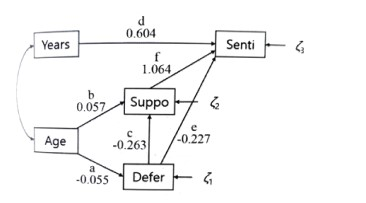

#### 직접효과
- **두 변수 사이의 직접적인 인과관계를 나타냄 $\rightarrow$ 직접효과 (direct effect)**
    * Suppo $\leftarrow$ Age에 해당하는 회귀계수 : 0.057 : Age가 1단위 증가하면 Suppo가 0.057단위 증가함을 의미
   
<br>

#### 매개효과 (mediating effect)
- **어떤 원인변수가 매개변수를 통해 결과변수(내생변수)에 영향을 미치는 정도**
    - **관련된 경로들에 대한 회귀계수들의 곱으로 계산**

        - Age $\rightarrow$ Defer $\rightarrow$ Suppo : -0.057 X -0.263 = 0.015
    
        - Age $\rightarrow$ Senti :
        
            - Age $\rightarrow$ Defer $\rightarrow$ Senti = -0.055 X -0.227 = 0.012
            - Age $\rightarrow$ Suppo $\rightarrow$ Senti = 0.057 X 1.064 = 0.061
            - Age $\rightarrow$ Defer $\rightarrow$ Senti = -0.055 X -0.263 X 1.064 = 0.015

<br>

#### 간접효과 (in-direct effect)
- **관련된 매개효과의 합**
    -  Age $\rightarrow$ Senti의 간접효과 : 0.012 + 0.061 + 0.015 = 0.089

<br>

#### 총효과 (total effect)
- **직접효과와 간접효과를 더함**
    - Age $\rightarrow$ Suppo의 총효과 : 0.057 + 0.015 = 0.072
   

<br>

## 06.02. 회귀분석을 통한 매개효과 검정

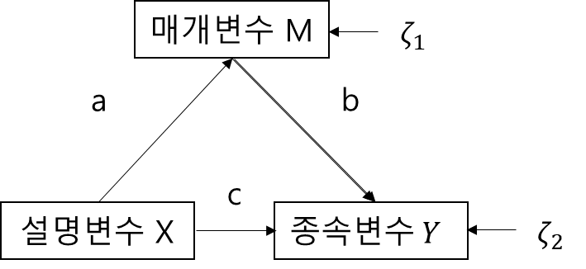

#### 0. 설명변수와 종속변수의 인과관계 검토
- 설명변수가 종속변수와 연관되어 있는지 검정

$$Y = \alpha+ eX + \epsilon$$

- **가설 $H_0 : e = 0$이 기각되면, 설명변수 X가 종속변수 Y와 연관되어 있는 것으로 결론**

<br>

#### 1. 설명변수와 매개변수의 인과관계 검토
- 설명변수가 매개변수와 연관되어 있는지를 검정

$$M = \alpha_1 + a X + \zeta_1$$

- **가설 $H_0 : a = 0$이 기각되면, 설명변수 X가 매개변수 M과 연관되어 있는 것으로 결론**

<br>

#### 2. 간접효과에 대한 검정
- 설명변수를 통제한 상태에서 매개변수가 반응변수에 영향을 주는 지를 검정

$$Y = \alpha_2 + bM + cX + \zeta_2$$

- **가설 $H_0 : b = 0$이 기각되면, 설명변수 X를 통제한 상태에서 매개변수 M이 반응변수 Y에 영향을 미치는 것으로 결론**

    **또한, $d=ab$라고 할 때, 가설 $H_0:d=0$이 기각되면 매개효과가 있는 것으로 결론**

<br>


#### 3. 직접효과에 대한 검정
- 매개변수가 설명변수와 반응변수의 관계를 완전매개하는지를 검정

$$Y = \alpha_2 + bM + cX + \zeta_2$$

- **가설 $H_0 : c = 0$이 기각되면, '부분매개'효과가 있다고 결론, 그렇지 않으면 '완전매개'효과가 있다고 결론**

<br>

#### 불일치매개 (inconsistent mediation)
- **직접효과 c와 간접효과 d의 부호가 다를 경우**
    - c와 d의 크기가 상쇄되어 총효과 $e\;(=c+d)$가 매우 작을 수 있음
    - 이런 경우, 매개변수는 억제변수 (supressor variable)의 역할을 수행

<br>

### 회귀분석을 이용한 매개효과 검정

In [2]:
library(lavaan)
library(sem)
library(semPlot)
library(semptools)
library(psych)
library(tidyverse)

In [3]:
detach("package:sem",unload=TRUE)

Warning message:
"'sem' namespace cannot be unloaded:
  namespace 'sem' is imported by 'semPlot' so cannot be unloaded"


In [4]:
Mediator <- read.csv(paste0(getwd(), "/Data/Mediator.csv"), header = TRUE)
Mediator %>% head

,X,M,Y
,<int>,<int>,<int>
1,55,49,44
2,53,45,42
3,54,51,54
4,48,48,44
5,51,54,52
6,53,46,44


In [8]:
library(lm.beta)
library(tidymodels)

#### 0. 설명변수와 종속변수의 인과관계 검토
- Y에 대한 X의 회귀계수는 통계적으로 유의 $\rightarrow$ 설명변수 X와 종속변수 Y사이에 인과관계 있는 것으로 결론

In [14]:
Mediator.0.fit <- lm(Y ~ X, Mediator)
Mediator.0.beta <- lm.beta(Mediator.0.fit)
tidy(Mediator.0.beta)

term,estimate,std_estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),77.1158525,NA,4.8506479,15.898052,1.580490e-35
X,-0.5439071,-0.3956923,0.0965368,-5.634194,7.110871e-08


<br>

#### 1. 설명변수와 매개변수의 인과관계 검토
- M에 대한 X의 회귀계수가 통계적으로 유의 $\rightarrow$ 설명변수 X와 매개변수 M사이에 인과관계가 있는 것으로 결론

In [30]:
Mediator.1.fit <- lm(M ~ X, Mediator)
Mediator.1.beta <- lm.beta(Mediator.1.fit)
tidy(Mediator.1.beta)

term,estimate,std_estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),65.249035,NA,2.72926024,23.907224,2.064179e-56
X,-0.301498,-0.3907283,0.05431729,-5.550681,1.067868e-07


<br>

#### 2. 간접효과에 대한 검정
- 매개변수 M에 대한 회귀계수는 통계적으로 유의 $\rightarrow$ 간접효과의 추정치 $\hat{d} = \hat{a} \times \hat{b} =-0.302 \times 1.081=-0.326$


In [31]:
Mediator.2.fit <- lm(Y ~ M + X, Mediator)
Mediator.2.beta <- lm.beta(Mediator.2.fit)
tidy(Mediator.2.beta)

term,estimate,std_estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),6.6080602,NA,8.04864978,0.8210147,4.127877e-01
M,1.0805952,0.6066043,0.10822153,9.9850296,9.143872e-19
X,-0.2181098,-0.1586748,0.08350706,-2.6118725,9.810546e-03


- 가설 $H_0:d=0$에 대한 검정은 z-통계량을 이용하여 수행 (Soble's Test)

$$z_{\hat{d}} = {{\hat{a}\times\hat{b}}\over{SE_{\hat{a}\times\hat{b}}}}={{\hat{a}\times\hat{b}}\over{\sqrt{\hat{b}^2 \times SE^2_{\hat{a}}+\hat{a}^2 \times SE^2_{\hat{b}}}}}$$

$$(SE = \;각\;통계량들에\;대한\;표준오차)$$

In [32]:
a = -0.301498; b = 1.0805952; SE_a = 0.05431729; SE_b = 0.10822153
z_value <- (a * b) / sqrt(b^2 * SE_a^2 + a^2 * SE_b^2); z_value

[1] -4.851459

* Soble Test p-value < 0.05

In [34]:
p_value <- 2 * (1 - pnorm(abs(z_value))); p_value

[1] 1.225568e-06

<br>

#### 3. 직접효과에 대한 검정
$$Y = \alpha_2 + bM + cX + \zeta_2 = 6.608 + 1.081M -0.218X + \zeta_2$$

- **c(=-0.218)가 통계적으로 유의 $\rightarrow$ 가설 $H_0 : c=0$에 기각 $\rightarrow$ 부분매개 효과 결론**
* 총효과 추정치 $\hat{e} = \hat{c} + \hat{d} = -0.218 - 0.326 = -0.544$
    - 0단계에서 얻은 단순 회귀분석의 계수와 동일
   

<br>

### 경로분석을 통한 매개효과 검정
* 구조방정식모형을 이용하면 매개효과 검정과, 관련된 모수의 추정, 간접효과와 총효과에 대한 추정/검정을 쉽게 수행할 수 있음
- 잠재변수를 고려하는 경우에도 매개효과 분석을 수행 할 수 있고, 여러 개의 설명변수, 매개변수, 종속변수들을 포함하여 분석을 수행 가능
$$\begin{cases}
M = aX + \zeta_1\\
Y = bM + cX + \zeta_2\\
\end{cases}$$

$$Y = (c+ab)X + \epsilon = (c+d)X + \epsilon$$

<br>

#### 간접효과 및 총효과에 대한 추정과 검정을 위해서는 모형설정 부분에서 먼저 경로계수의 이름을 지정해야 함
- **간접효과 및 총효과의 내용을 `:=`로 지정**

In [41]:
Mediator.A <- "
    # regression
    M ~ a * X
    Y ~ b * M + c * X
    
    # Indirect Effect
    d := a * b
    
    # Total Effect
    e := c + a * b
"

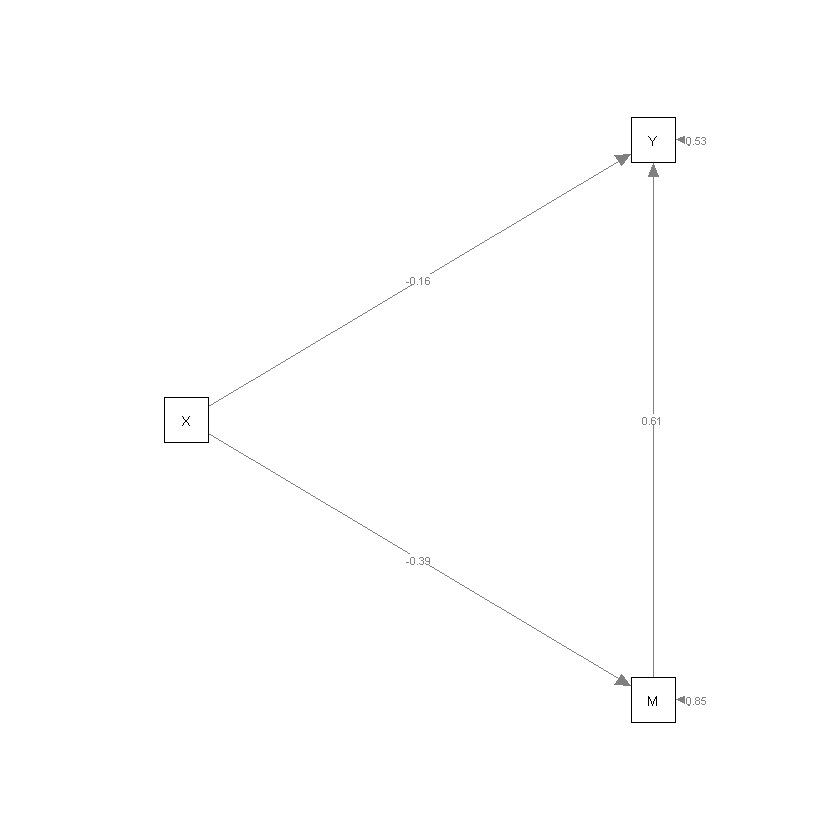

In [36]:
Mediator.A.fit <- sem(Mediator.A, Mediator)
semPaths(Mediator.A.fit, whatLabels = "std", style = "lisrel", nCharNodes = 0, rotation = 2)

In [50]:
summary(Mediator.A.fit, fit.measures = TRUE, rsquare = TRUE, standardized = TRUE)$pe %>%
    filter(op == "~")

lhs,op,rhs,label,exo,est,se,z,pvalue,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,~,X,a,0,-0.3014980,0.05400241,-5.583047,2.363407e-08,-0.3014980,-0.3907283,-0.10127017
Y,~,M,b,0,1.0805952,0.10727909,10.072747,0.000000e+00,1.0805952,0.6066043,0.60660429
Y,~,X,c,0,-0.2181098,0.08277984,-2.634818,8.418251e-03,-0.2181098,-0.1586748,-0.04112584


In [55]:
summary(Mediator.A.fit, fit.measures = TRUE, rsquare = TRUE, standardized = TRUE)$pe %>%
    filter(op == ':=')

lhs,op,rhs,label,exo,est,se,z,pvalue,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
d,:=,a*b,d,0,-0.3257973,0.06671910,-4.883119,1.04421e-06,-0.3257973,-0.2370175,-0.06143092
e,:=,c+a*b,e,0,-0.5439071,0.09597717,-5.667046,1.45280e-08,-0.5439071,-0.3956923,-0.10255676


<br>

**경로분석을 이용한 매개변수 효과**
- 경로계수

| 내생변수 | 설명변수 | 추정치 | 표준화추정치 | p-val | SMC |
| - | - | - | - | - | - |
| M | X | -0.301 | -0.391 | <.001 | 0.153 |
| | 
| Y | M | 1.081 | 0.607 | <.001 | 0.468 |
| | X | -0.218 | -0.159 | 0.008 | |

<br>

- 매개효과 ($X \rightarrow Y$)

| 효과 | 추정치 | 표준화추정치 | p-val |
| - | - | - | - |
| 직접효과 | -0.218 | -0.159 | 0.008 |
| 간접효과 | -0.326 | -0.237 | <0.001 |
| 총효과 | -0.544 | -0.396 | <0.001 |

<br>

## 06.03. 잠재변수가 없는 모형

In [67]:
Union <- read.csv(paste0(getwd(), "/Data/Union.csv"), header = TRUE)

In [43]:
Union.C <- "
    # regression
    Defer ~ a * Age
    Suppo ~ b * Age + c * Defer
    Senti ~ d * Years + e * Defer + f * Suppo
    
    # Indirect Effect
    Ind_Suppo_Age := a * c
    Ind_Senti_Age := a * e + b * f + a * c * f
    Ind_Senti_Defer := c * f

    # Total Effect
    Tot_Suppo_Age := b + a * c
    Tot_Senti_Defer := e + c * f
"

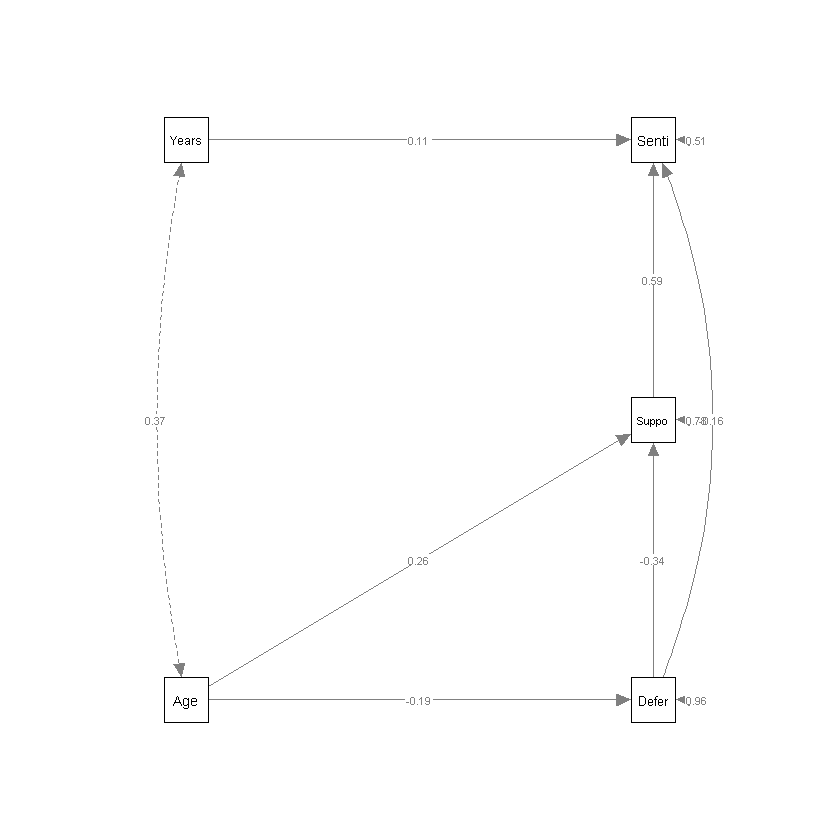

In [45]:
Union.C.fit <- sem(Union.C, Union)
semPaths(Union.C.fit, whatLabels = "std", style = "lisrel", nCharNodes = 0, rotation = 2)

In [47]:
tidy(fitMeasures(Union.C.fit)) %>%
    filter(names %in% c("chisq", "df", "gfi", "agfi", "cfi", "tli", "rmsea", "srmr"))

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<lvn.vctr>
chisq,2.20807302
df,3.00000000
cfi,1.00000000
tli,1.01524796
rmsea,0.00000000
srmr,0.03250038
gfi,0.99166959
agfi,0.95834796


- 직접효과

In [57]:
summary(Union.C.fit, fit.measures = TRUE, rsquare = TRUE, standardized = TRUE)$pe %>%
    filter(op == "~") %>% select(lhs, op, rhs, est, std.all)

lhs,op,rhs,est,std.all
<chr>,<chr>,<chr>,<dbl>,<dbl>
Defer,~,Age,-0.05517988,-0.1922468
Suppo,~,Age,0.05747751,0.2595176
Suppo,~,Defer,-0.26300024,-0.3408369
Senti,~,Years,0.60448739,0.1145623
Senti,~,Defer,-0.22679321,-0.1640180
Senti,~,Suppo,1.06386807,0.5936886


- 간접효과 & 총효과

In [60]:
summary(Union.C.fit, fit.measures = TRUE, rsquare = TRUE, standardized = TRUE)$pe %>%
    filter(op == ":=") %>% select(lhs, op, rhs, est, std.all)

lhs,op,rhs,est,std.all
<chr>,<chr>,<chr>,<dbl>,<dbl>
Ind_Suppo_Age,:=,a*c,0.01451232,0.06552479
Ind_Senti_Age,:=,a*e+b*f+a*c*f,0.08910210,0.22450588
Ind_Senti_Defer,:=,c*f,-0.27979755,-0.20235099
Tot_Suppo_Age,:=,b+a*c,0.07198983,0.32504235
Tot_Senti_Defer,:=,e+c*f,-0.50659077,-0.36636898


<br>

| 내생변수 | 설명변수 | 직접효과 | 간접효과 | 총효과 |
| - | - | - | - | - |
| Defer | Age | -0.055 | - | -0.055 |
| |
| Suppo | Age | 0.057 | 0.015 | 0.072 |
|  | Defer | -0.263 | - | -0.263 |
| | 
| Senti | Years | -0.604 | - | -0.604 |
|  | Age | - | 0.089 | 0.089 |
|  | Defer | -0.227 | -0.280 | -0.507 |
|  | Suppo | 1.064 | - | 1.064 |

<br>

## 06.04. 다중 매개효과의 계산과 검정

- 인과관계 'Age $\rightarrow$ Senti'의 경우 3개의 매개효과 경로가 존재

In [63]:
Union.C <- "
    # regression
    Defer ~ a * Age
    Suppo ~ b * Age + c * Defer
    Senti ~ d * Years + e * Defer + f * Suppo
    
    # Multiple Mediating Effect
    ae := a * e
    bf := b * f
    acf  := a* c * f
"

In [65]:
Union.C.fit <- sem(Union.C, Union)

In [ ]:
tidy(fitMeasures(Union.C.fit)) %>%
    filter(names %in% c("chisq", "df", "gfi", "agfi", "cfi", "tli", "rmsea", "srmr"))

In [66]:
summary(Union.C.fit, fit.measures = TRUE, rsquare = TRUE, standardized = TRUE)$pe %>%
    filter(op == ":=") %>% select(lhs, op, rhs, est, std.all)

lhs,op,rhs,est,std.all
<chr>,<chr>,<chr>,<dbl>,<dbl>
ae,:=,a*e,0.01251442,0.03153193
bf,:=,b*f,0.06114849,0.15407262
acf,:=,a*c*f,0.01543919,0.03890132


**인과관계 'Age $\rightarrow$Senti'에 대한 효과 분해**

|구분| 효과 | 추정치 | 표준화추정치 | p-val |
| -| - | - | - | - |
| 간접효과 | Age - Defer - Senti | 0.013 | 0.032 | 0.059 |
|  | Age - Defer - Senti | 0.061 | 0.154 | 0.001 |
|  | Age - Defer - Senti | 0.015 | 0.039 | 0.026 |
| 총효과 |  | 0.089 | 0.025 | <.001 |

<br>

## 06.05. 잠재변수가 있는 모형

In [68]:
Jobsatis <- read.csv(paste0(getwd(), "/Data/Jobsatis.csv"), header = TRUE)

In [69]:
Jobsatis.C <- "
    # measurement
    ACHMOT =~ Achmot1 + Achmot2
    TSSE =~ Tsse1 + Tsse2
    VERBINT =~ Verbint1
    PERFORM =~ Perform1
    JOBSATIS =~ Jobsatis1 + Jobsatis2

    # structure
    PERFORM ~ a * TSSE
    JOBSATIS ~ b * ACHMOT + c * VERBINT + d * PERFORM

    # error variance
    Verbint1 ~~ 0.509 * Verbint1
    Perform1 ~~ 0 * Perform1

    # indirect effect
    Ind_JOBSATIS_TSSE := a * d
"

In [71]:
Jobsatis.C.fit <- sem(Jobsatis.C, Jobsatis)

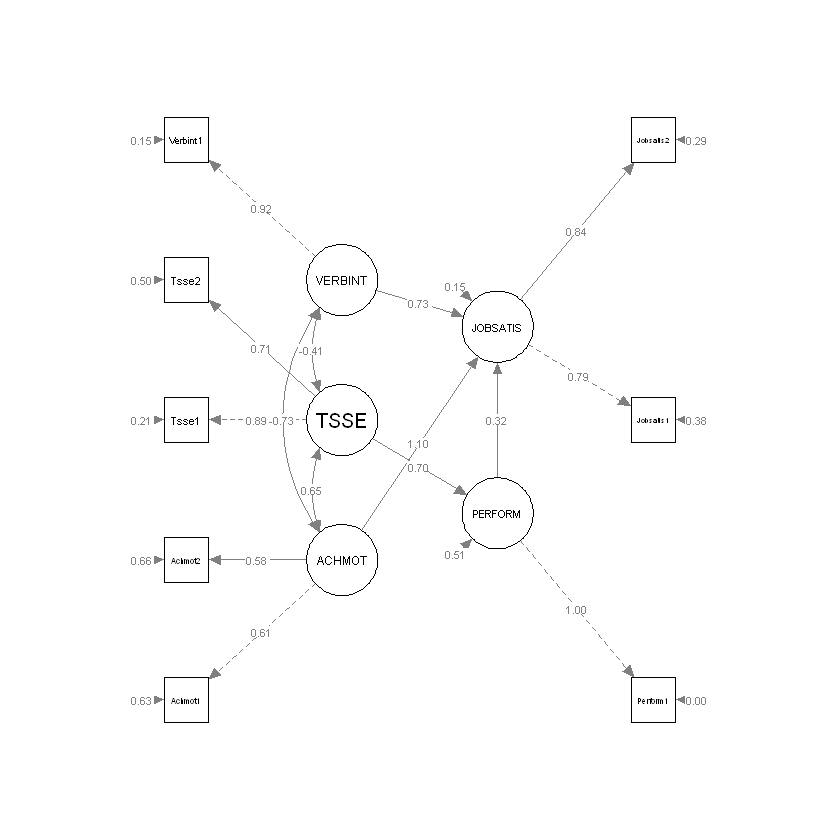

In [83]:
semPaths(Jobsatis.C.fit, whatLabels = "std", style = "lisrel", nCharNodes = 0, rotation = 2)

**매개 분해**

|내생변수| 설명변수 | 직접효과 | 간접효과 | 총효과l |
| -| - | - | - | - |
| PERFORM | TSSE | 0.739 | - | 0.739 |
| |
| JOBSATIS | ACHMOT | 2.554 | - | 2.554 |
|  | TSSE | - | 0.322 | 0.322 |
|  | VERBINT | 0.660 | - | 0.606 |
|  | VERBINT | 0.436 | - | 0.436 |

In [76]:
summary(Jobsatis.C.fit, fit.measures = TRUE, rsquare = TRUE, standardized = TRUE)$pe %>%
    filter(op %in% c("~", ":=")) %>% select(lhs, op, rhs, est, std.all)

lhs,op,rhs,est,std.all
<chr>,<chr>,<chr>,<dbl>,<dbl>
PERFORM,~,TSSE,0.7389525,0.6994333
JOBSATIS,~,ACHMOT,2.5539420,1.1012525
JOBSATIS,~,VERBINT,0.6062814,0.7345907
JOBSATIS,~,PERFORM,0.4360882,0.3173645
Ind_JOBSATIS_TSSE,:=,a*d,0.3222485,0.2219753
